In [1]:
import mlgrad.pca as pca
import mlgrad.inventory as inventory
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("data/starsCYG.csv", sep=",")
X = np.c_[df["log.Te"], df["log.light"]]

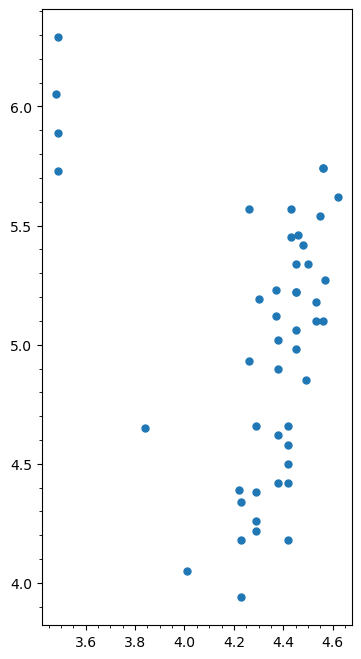

In [3]:
plt.figure(figsize=(4, 8))
plt.scatter(X[:,0], X[:,1], s=25, label="0")
plt.minorticks_on()
plt.show()

In [4]:
c0 = pca.location(X)
C0 = pca.scatter_matrix(X-c0)
S0 = np.linalg.inv(C0)
print(c0)
# print(C0)
print(S0)

[4.310 5.012]
[[12.640  1.354]
 [ 1.354  3.276]]


In [5]:
def eval_dd(S, c, xr, yr):
    xx, yy = np.meshgrid(xr, yr)
    xy = np.c_[xx.ravel(), yy.ravel()]
    dd = inventory.mahalanobis_distance(S, xy, c)
    dd = np.sqrt(dd.reshape(xx.shape))
    return xx, yy, dd

xb = inventory.array_bounds(X[:,0], 0.01)
yb = inventory.array_bounds(X[:,1], 0.01)
xrange = np.linspace(xb[0], xb[1], 101)
yrange = np.linspace(yb[0], yb[1], 101)
xx, yy, dd = eval_dd(S0, c0, xrange, yrange)

[[167.753 -19.286]
 [-19.286   5.894]]
[np.float64(-2.320113645009223), np.float64(-4.010973064252251), np.float64(-4.111705642180806), np.float64(-3.9775428341861674), np.float64(-4.111705641867356)]


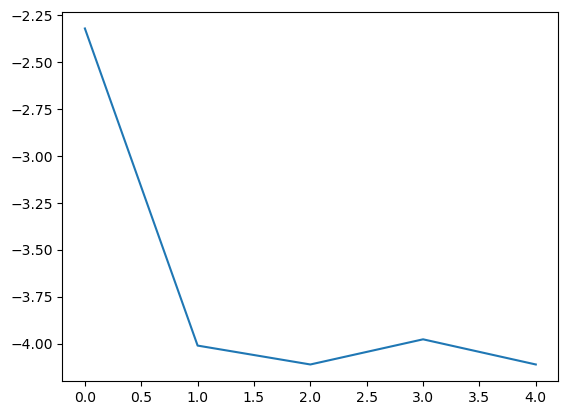

[170.019   3.628]


In [6]:
from mlgrad.af import averaging_function
import mlgrad.funcs as funcs

wma = averaging_function("WM", funcs.SoftAbs_Sqrt(0.001), kwds={"alpha":0.84})
# wma = averaging_function("WMZ", kwds={"alpha":3.5})
qvals = []
cc, SS = pca.robust_location_scatter(X, wma, qvals=qvals)
print(SS)
plt.plot(qvals)
print(qvals)
plt.show()
print(np.linalg.eigvals(SS))

In [7]:
xx, yy, dd1 = eval_dd(SS, cc, xrange, yrange)

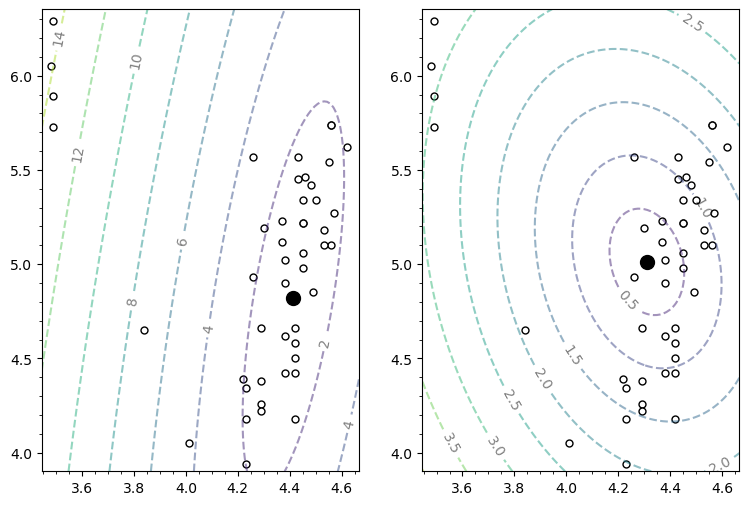

In [8]:
plt.figure(figsize=(9, 6))
plt.subplot(1,2,1)
plt.scatter(X[:,0], X[:,1], s=25, c='w', edgecolors='k', label="0")
plt.scatter([cc[0]], [cc[1]], s=100, c='k')
cs1 = plt.contour(xx, yy, dd1, alpha=0.5, linestyles='--')
plt.clabel(cs1, colors='k', fontsize=10)
plt.minorticks_on()
plt.subplot(1,2,2)
plt.scatter(X[:,0], X[:,1], s=25, c='w', edgecolors='k', label="0")
plt.scatter([c0[0]], [c0[1]], s=100, c='k')
cs = plt.contour(xx, yy, dd, alpha=0.5, linestyles='--')
plt.clabel(cs, colors='k', fontsize=10)
plt.minorticks_on()
plt.show()
print(cc)

In [9]:
c2, As2, Ls2 = pca.find_robust_loc_and_pc(X, wma, 2, tol=1.0e-6, mode="max")
print(Ls2)
print(As2)
Us2 = pca.transform(X, c2, As2)
S2 = Us2.T @ Us2
# print(S2)
S2 = np.linalg.inv(S2)
print(S2)

[0.304 0.022]
[[ 0.112  0.994]
 [ 0.994 -0.112]]
[[0.079 0.050]
 [0.050 0.260]]


In [10]:
xx, yy, dd2 = eval_dd(S2, c2, xrange, yrange)

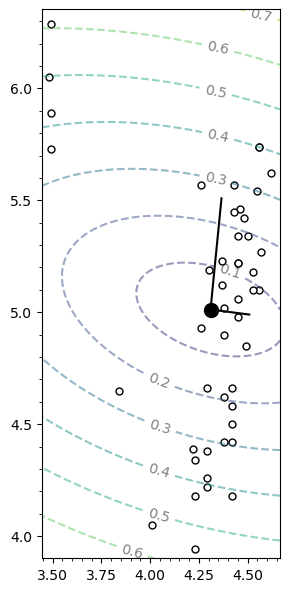

In [11]:
plt.figure(figsize=(3, 3*(yb[1]-yb[0])/(xb[1]-xb[0])))
plt.scatter(X[:,0], X[:,1], s=25, c='w', edgecolors='k', label="0")
plt.scatter([c2[0]], [c2[1]], s=100, c='k')
plt.plot([c2[0], c2[0]+0.5*As2[0,0]], [c2[1], c2[1]+0.5*As2[0,1]], color='k')
plt.plot([c2[0], c2[0]+0.2*As2[1,0]], [c2[1], c2[1]+0.2*As2[1,1]], color='k')
cc = plt.contour(xx, yy, dd2, alpha=0.5, linestyles='--')
plt.clabel(cc, colors='k', fontsize=10)
plt.minorticks_on()
plt.tight_layout()
plt.show()